In [1]:
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
churn_data = pd.read_csv('/Users/aleksejvolkov/Projects_VS_Code/IDE/data_set/churn.csv', sep=',')
churn_data_drop = churn_data.drop('RowNumber', axis=1)

In [2]:
churn_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


**Задание 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**


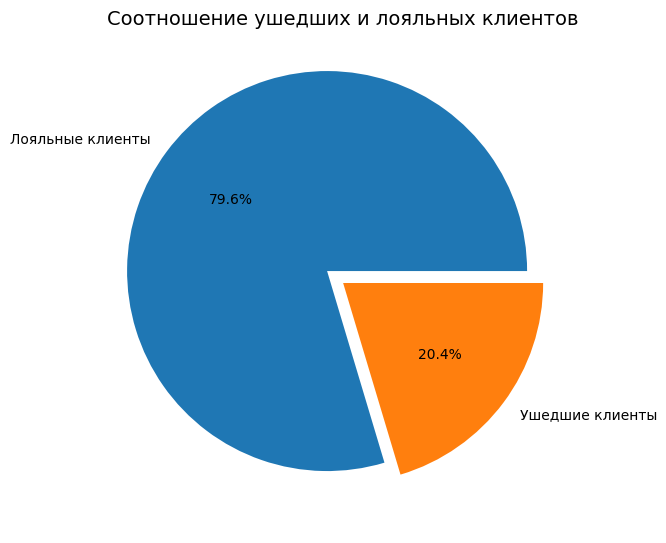

In [3]:
churn_data_drop['client_sign'] = churn_data_drop['Exited'].apply(lambda x: 'Ушедшие клиенты' if x == 1 else 'Лояльные клиенты')
client_combinations = churn_data_drop['client_sign'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=14)
axes.pie(
    client_combinations,
    labels=client_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0]
    
);

На данном графике представлена доля ушедших (20.4%) и оставшихся клиентов (79.6%) банка от общего числа всех клиентов. Считаю, что данный график подходит для решения данного вопроса.

**Задание 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**

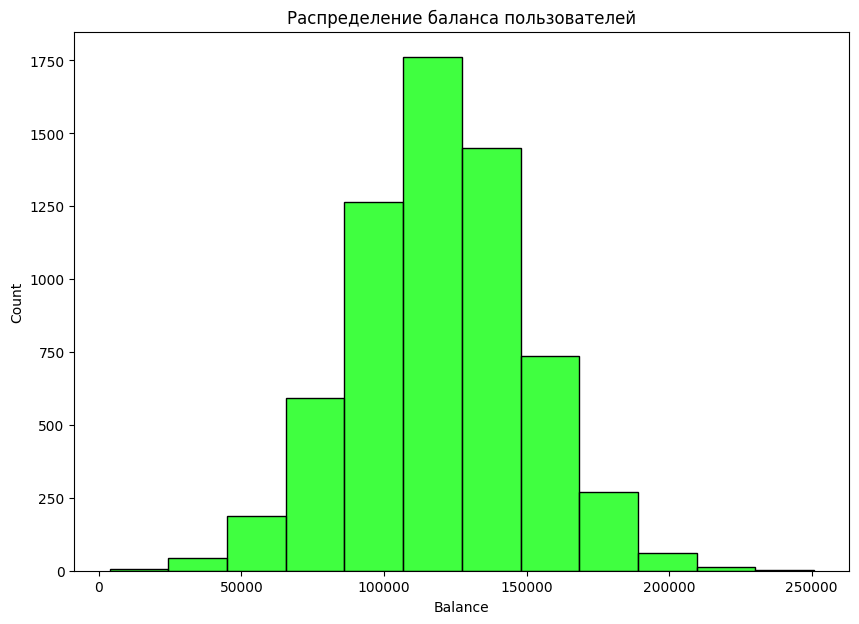

In [4]:
# Вариант 1.
churn_data = churn_data_drop
churn_data_balance = churn_data[churn_data['Balance'] > 2500]
fig = plt.figure(figsize=(10, 7))
histplot = sns.histplot(
    data=churn_data_balance,
    x='Balance',
    bins=12,
    color="lime",
)
histplot.set_title('Распределение баланса пользователей');

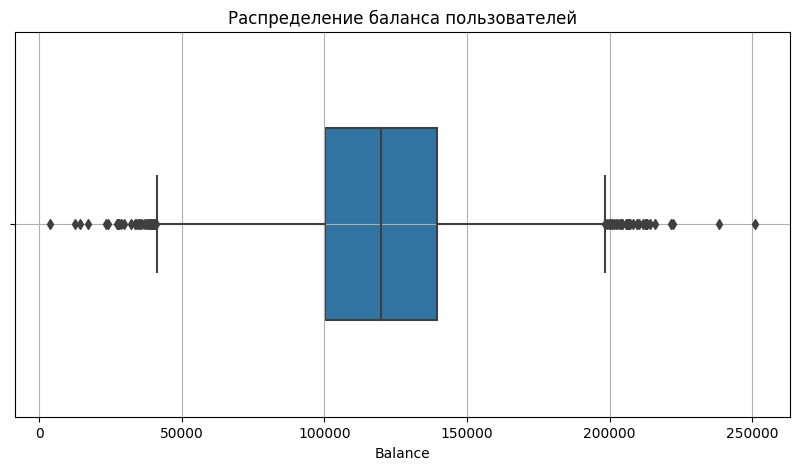

In [5]:
# Вариант 2.

fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_data_balance,
    x='Balance',
    orient='h',
    width=0.5
);
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Balance');
boxplot.grid()

При решении данной задачи можно использовать 2 варианта (гистограмма и коробчатую диаграмму). На данной гистограмме изображено распределение баланса пользователей (при условии: баланс > 2500). Судя по графику модальное значение баланса сосредоточено в 120000.

Из коробчатой диаграммы видим мидиану 120000, 25 квантиль 100000, 75 квантиль 140000, min 40000, max 190000.

**Задание. 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

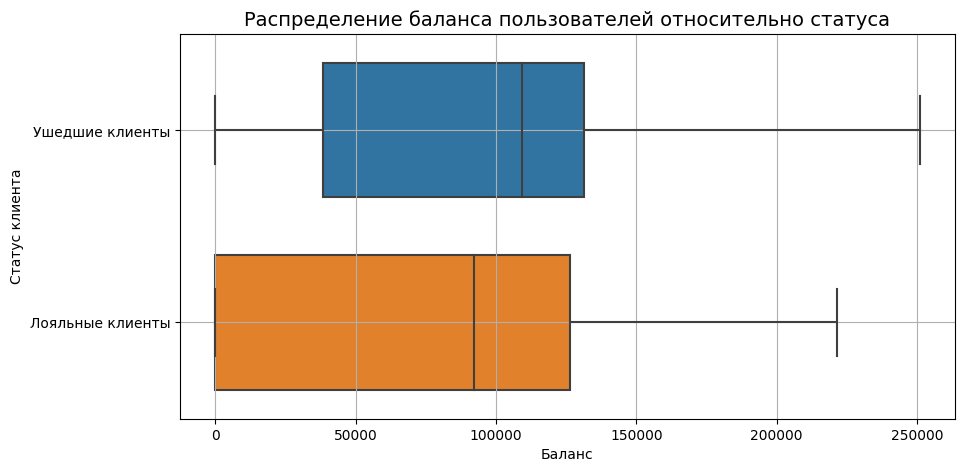

In [6]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_data, 
    x='Balance', 
    y='client_sign',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение баланса пользователей относительно статуса', fontsize=14);
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Статус клиента');
boxplot.grid()

В данном задании не использовал фильтрацию по величине баланса клиента. Исходя из распределения для двух категорий клиентов (ушедший и лояльный), можно сделать вывод по характеристикам: у лояльных клиентов есть минимальные балансы, медианное значение ниже. У ушедших клиентов чуть выше величина баланса, а также медиана и также выше и max значение их распределения. Возможно активные клиенты не так давно в данном банке и их устраивает процентная ставка на накопительному счету, а у клиентов со стажем она ниже и они решают уйти в поисках более выгодных условий. Возможно есть еще какие-либо параметры, влияющие на величину процента накопления.

**9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**

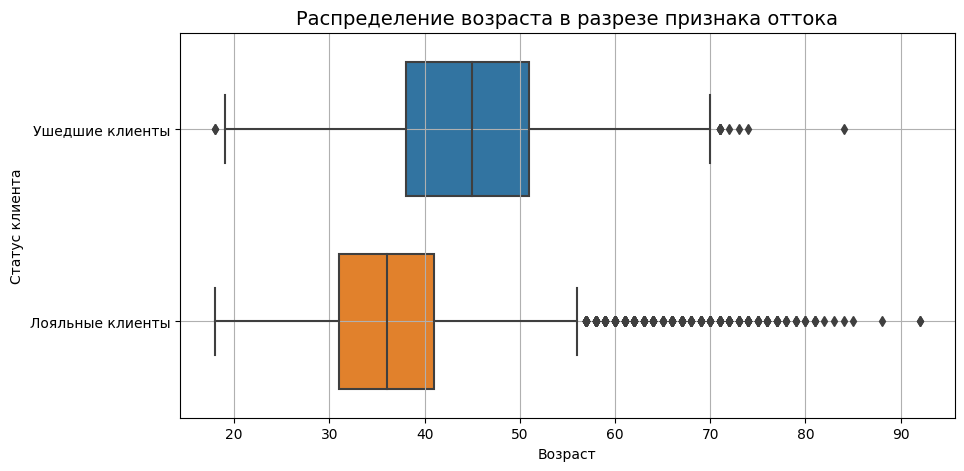

In [7]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_data, 
    x='Age', 
    y='client_sign',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение возраста в разрезе признака оттока', fontsize=14);
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Статус клиента');
boxplot.grid()

Из данного графика видно, что  возрастные характеристики двух групп клиентов отличаются. У лояльных клиентов средний возраст 36 лет, да и в целом клиенты помоложе по сравннию с другой группой. Однако у лояльных клиентов присутствует большое количество выбросов, они начинаются после 56 лет и выше и в целом такие возрасты имеют место быть. У группы ушедших клиентов средний возраст по выше 45 лет, да и в целом люди этой группы будут по старше, однако выбросов здесь наблюдается гораздо меньше. Не сомненно банку необходимо обратить внимание на категорию клиентов 40+ и предложить им интересные условия сотрудничества.

**9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

In [8]:
churn_data['Exited'] = churn_data['Exited'].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    1 : 'Exited',
    0 : 'Loyal'
})

churn_data_sal_cred = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].mean()

fig = px.scatter(
    data_frame=churn_data_sal_cred,
    x = 'EstimatedSalary',
    y = 'CreditScore',
    color='Exited',
    width=700,
    height=300,
    title='Зависимость крединого рейтинга от предполагаемой заработной платы',
)
fig.show()

По графику без группировки не видно взаимосвязи рейтинга и зарплаты.
Группировка по рейтингу и средняя заработная плата дают возможность увидеть, что у лояльных клиентов разброс средних заработных плат не такой сильных, как у ушедших. Так же видно, что среди ушедших клиентов много клиентов с большой зароботной платой, но маленьким кредитным рейтингом.

**9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

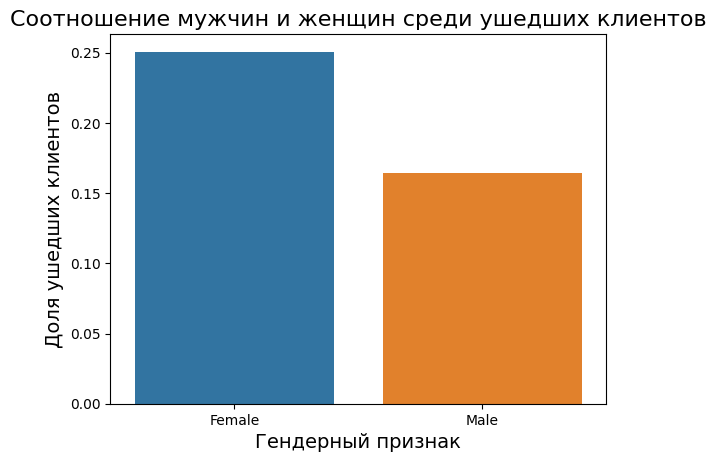

In [9]:
churn_data['Exited'] = churn_data['Exited'].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    'Exited' : 1,
    'Loyal': 0
})
churn_data['Exited'] = churn_data['Exited'].astype('int64')
churn_data_gender = churn_data.groupby(['Gender'], as_index=False)['Exited'].mean()

barplot = sns.barplot(
    data=churn_data_gender,
    x='Gender',
    y='Exited',
    orient='v',
)
barplot.set_title('Соотношение мужчин и женщин среди ушедших клиентов', fontsize=16);
barplot.set_ylabel('Доля ушедших клиентов', fontsize=14);
barplot.set_xlabel('Гендерный признак', fontsize=14);

Из данного графика видно, что чаще уходят женщины.

**9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

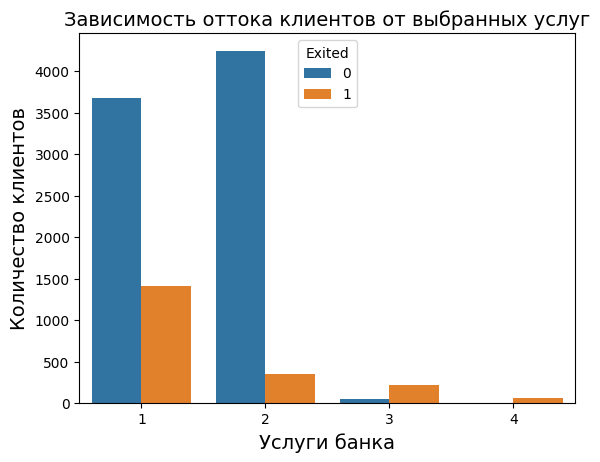

In [10]:
grouped_row = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

barplot = sns.barplot(
    data=grouped_row,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
    orient='v'
)
barplot.set_title('Зависимость оттока клиентов от выбранных услуг', fontsize=14);
barplot.set_xlabel('Услуги банка', fontsize=14);
barplot.set_ylabel('Количество клиентов', fontsize=14);

Из графика видно, что 1 и 2 услуги самые популярные (причем что у лояльных пользователей, что у ушедших). 3 и 4 услуги являются не популярными, причем ушедших клиентов, пользовавшихся 3 услугой больше, чем лояльных клиентов, а 4 услугой вообще не пользуются действующие клиенты. Нужно поработь над спектром предлагаемых услуг 3 и 4 для действующих клиентов, а 1 и 2 для удержания.

**9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**

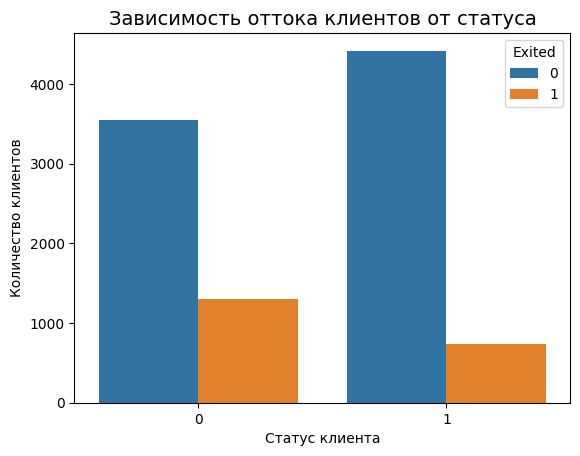

In [11]:
grouped_row_1 = churn_data.groupby(['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()

barplot = sns.barplot(
    data=grouped_row_1,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited',
    orient='v'
)
barplot.set_title('Зависимость оттока клиентов от статуса', fontsize=14);
barplot.set_xlabel('Статус клиента', fontsize=10);
barplot.set_ylabel('Количество клиентов', fontsize=10);

Исходя из графика можно сделать вывод, что клиентов, у которых есть статус активный больше. А вот ушедших клиентов больше именно тех, у которых статуса нет. То есть можно разработать программу лояльности для не активных пользователей, чтобы снизить отток в данной категории.

**9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано**

In [12]:
import plotly.express as px
churn_data_geo = churn_data.groupby('Geography', as_index=False)['Exited'].mean()
fig = px.choropleth(
    data_frame=churn_data_geo,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    range_color=[0, 0.3],
    title='Средний отток клиентов по странам',
    width=800, 
    height=500, 
    color_continuous_scale='Reds'
)
fig.show()

![](./image/график 9.9.png)

#![](https://github.com/Alexey-919/practice_13/blob/master/image/%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%209.9.png)

Судя по графику отток клиентов в Германии в 2 раза больше, чем в Испании и Франции. Можно предположить, что это связано с большой конкуренцией (большое количество банков) и возможно с небольшим выбором услуг, поэтому клиенты перемещаются между банками в поисках более выгодных условий.

**9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.**

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

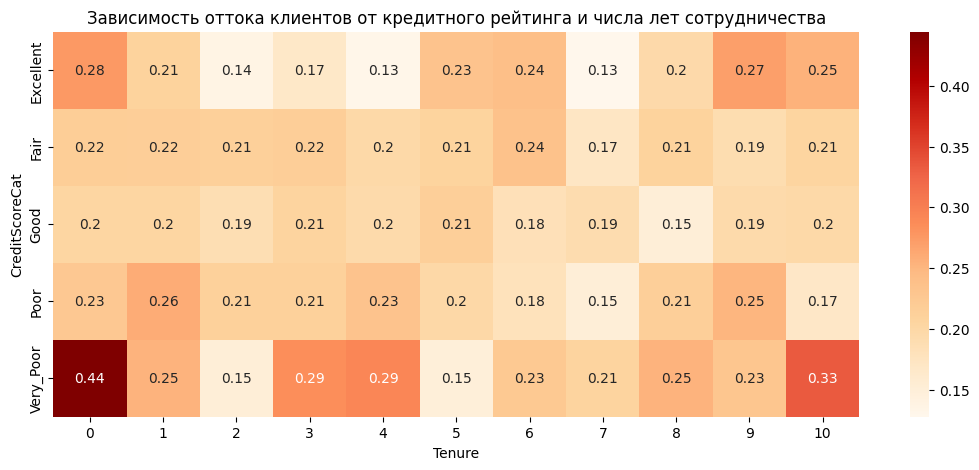

In [13]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    index = 'CreditScoreCat',
    columns = 'Tenure',
    values = 'Exited',
    aggfunc = 'mean'
)
fig = plt.figure(figsize=(13, 5))
ax = sns.heatmap(data=pivot, annot=True, cmap='OrRd');
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');

В целом, если присмотреться, то можно сделать некоторые выводы. Отток клиентов, практически по всем категориям кредитного рейтинга находится в пределах 20-23% (где-то даже меньше), от общего числа клиентов по каждой категории. Но конечно же стоит обратить свое внимание на величины более 23%, данные ячейки окрашены в более яркий оттенок. Наибольший отток находится в категории "Very_Poor", здесь достаточно высокие показатели для клиентов по срокам 1, 3, 4, 8, 10 . Необходимо присмотреться к цифрам и предложить клиентам данных категорий более выгодные условия. 